In [ ]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import copy
from scipy import stats

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def q(x, y):
  return sigmoid((x - y)**2)
  # return np.exp(-(x-1)**2 -(y-1)**2)

def qx(x, y):
  return 2 * (x-y) * deriv_sigmoid((x - y)**2)
  # return -2*(x-1)*np.exp(-(x-1)**2 -(y-1)**2)

def qy(x, y):
  return - 2 * (x-y) * deriv_sigmoid((x - y)**2)
  # return -2*(y-1)*np.exp(-(x-1)**2 -(y-1)**2)

In [ ]:
# params

N = 2000
temp = 0.01
lr = 0.2
epochs = 1000

r = 1
beta = np.arange(1, epochs + 1) ** r
B = np.cumsum(beta)

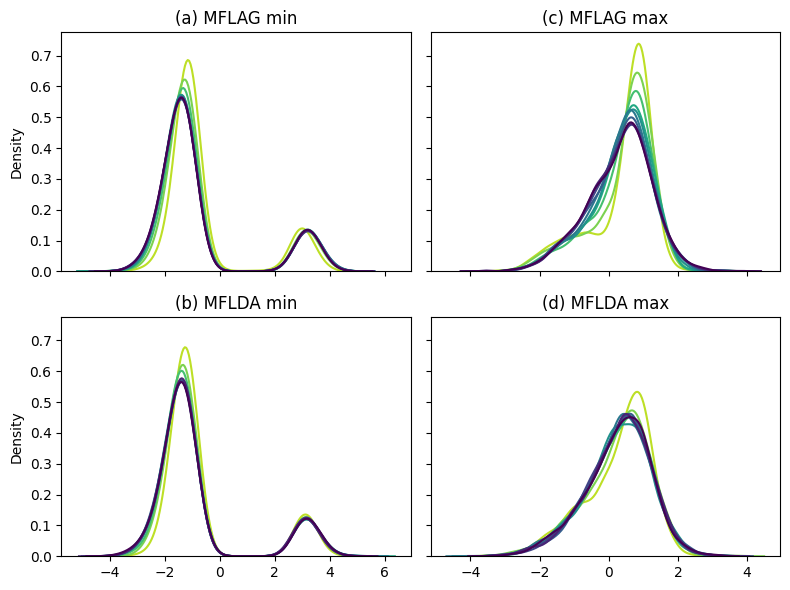

In [ ]:
# MFLAG
x = np.random.normal(size = N)
y = np.random.normal(size = N)
x_new = copy.copy(x)
y_new = copy.copy(y)
# vanilla MFLDA
x1 = np.random.normal(size = N)
y1 = np.random.normal(size = N)

conv_ag = np.zeros(epochs - 1)
conv_gda = np.zeros(epochs - 1)
ni_ag = np.zeros(epochs - 1)
ni_gda = np.zeros(epochs - 1)

p = plt.get_cmap('viridis')
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex = 'col', sharey = True)
plotstep = epochs // 10

for k in range(1, epochs):
  x_prev = copy.copy(x)
  y_prev = copy.copy(y)
  x1_prev = copy.copy(x1)
  y1_prev = copy.copy(y1)

  x_new = (1 - temp * lr) * x_new - lr * qx(x_new, y[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
  y_new = (1 - temp * lr) * y_new + lr * qy(x, y_new[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

  x_ind = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
  x_ind_new = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
  y_ind = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
  y_ind_new = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)

  x[x_ind] = x_new[x_ind_new]
  y[y_ind] = y_new[y_ind_new]

  x1 = (1 - temp * lr) * x1 - lr * qx(x1, y1[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
  y1 = (1 - temp * lr) * y1 + lr * qy(x1, y1[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

  conv_ag[k - 1] = stats.wasserstein_distance(x, x_prev) + stats.wasserstein_distance(y, y_prev)
  conv_gda[k - 1] = stats.wasserstein_distance(x1, x1_prev) + stats.wasserstein_distance(y1, y1_prev)

  ni_ag[k - 1] = max(q(x, y[:, None]).mean(), q(x, y1[:, None]).mean()) - min(q(x, y[:, None]).mean(), q(x1, y[:, None]).mean())
  ni_gda[k - 1] = max(q(x1, y1[:, None]).mean(), q(x1, y[:, None]).mean()) - min(q(x1, y1[:, None]).mean(), q(x, y1[:, None]).mean())

  if (k+1) % plotstep == 0:
    sns.kdeplot(x, color = p(1 - k/(epochs - 1)), ax = ax[0, 0])
    ax[0, 0].set_title('(a) MFLAG min')
    sns.kdeplot(y, color = p(1 - k/(epochs - 1)), ax = ax[0, 1])
    ax[0, 1].set_title('(c) MFLAG max')

    sns.kdeplot(x1, color = p(1 - k/(epochs - 1)), ax = ax[1, 0])
    ax[1, 0].set_title('(b) MFLDA min')
    sns.kdeplot(y1, color = p(1 - k/(epochs - 1)), ax = ax[1, 1])
    ax[1, 1].set_title('(d) MFLDA max')

# ax[1, 1].set_ylim(0, 0.25)

fig.tight_layout()
fig.show()

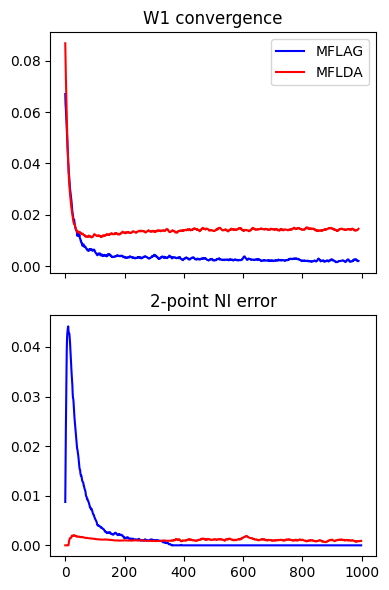

In [ ]:
window = 10

lst_moving_ag = []
lst_moving_gda = []
lst_ni_ag = []
lst_ni_gda = []

for iter in range(1):
  x = np.zeros(N)
  y = np.zeros(N)
  x_new = np.zeros(N)
  y_new = np.zeros(N)
  x1 = np.zeros(N)
  y1 = np.zeros(N)

  conv_ag = np.zeros(epochs - 1)
  conv_gda = np.zeros(epochs - 1)
  ni_ag = np.zeros(epochs - 1)
  ni_gda = np.zeros(epochs - 1)

  for k in range(1, epochs):
    x_prev = copy.copy(x)
    y_prev = copy.copy(y)
    x1_prev = copy.copy(x1)
    y1_prev = copy.copy(y1)

    x_new = (1 - temp * lr) * x_new - lr * qx(x_new, y[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
    y_new = (1 - temp * lr) * y_new + lr * qy(x, y_new[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

    x_ind = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
    x_ind_new = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
    y_ind = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)
    y_ind_new = np.random.choice(N, size = math.floor(beta[k] * N / B[k]), replace = False)

    x[x_ind] = x_new[x_ind_new]
    y[y_ind] = y_new[y_ind_new]

    x1 = (1 - temp * lr) * x1 - lr * qx(x1, y1[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
    y1 = (1 - temp * lr) * y1 + lr * qy(x1, y1[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

    conv_ag[k - 1] = stats.wasserstein_distance(x, x_prev) + stats.wasserstein_distance(y, y_prev)
    conv_gda[k - 1] = stats.wasserstein_distance(x1, x1_prev) + stats.wasserstein_distance(y1, y1_prev)

    ni_ag[k - 1] = max(q(x, y[:, None]).mean(), q(x, y1[:, None]).mean()) - min(q(x, y[:, None]).mean(), q(x1, y[:, None]).mean())
    ni_gda[k - 1] = max(q(x1, y1[:, None]).mean(), q(x1, y[:, None]).mean()) - min(q(x1, y1[:, None]).mean(), q(x, y1[:, None]).mean())

  conv = pd.DataFrame({'ag1': conv_ag, 'gda1': conv_gda})
  moving_ag = conv['ag1'].rolling(window).mean().values
  moving_ag = moving_ag[window - 1:]
  moving_gda = conv['gda1'].rolling(window).mean().values
  moving_gda = moving_gda[window - 1:]

  lst_moving_ag.append(copy.copy(moving_ag))
  lst_moving_gda.append(copy.copy(moving_gda))

  lst_ni_ag.append(copy.copy(ni_ag))
  lst_ni_gda.append(copy.copy(ni_gda))

fig1, ax1 = plt.subplots(2, 1, figsize=(4, 6), sharex = True)

ax1[0].plot(moving_ag, color = 'b')
ax1[0].plot(moving_gda, color = 'r')

ax1[1].plot(ni_ag, color = 'b')
ax1[1].plot(ni_gda, color = 'r')

ax1[0].set_title('(e) W1 convergence')
ax1[1].set_title('(f) 2-point NI error')

lines = [Line2D([0], [0], color=c) for c in ['b', 'r']]
labels = ['MFLAG', 'MFLDA']
ax1[0].legend(lines, labels)

fig1.tight_layout()
fig1.show()

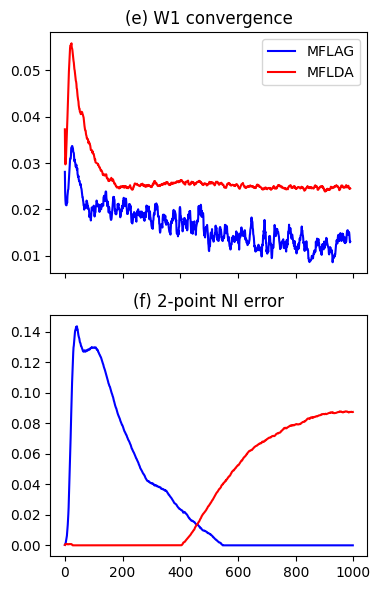

In [ ]:
fig1, ax1 = plt.subplots(2, 1, figsize=(4, 6), sharex = True)

ax1[0].plot(moving_ag, color = 'b')
ax1[0].plot(moving_gda, color = 'r')

ax1[1].plot(ni_ag, color = 'b')
ax1[1].plot(ni_gda, color = 'r')

ax1[0].set_title('(e) W1 convergence')
ax1[1].set_title('(f) 2-point NI error')

lines = [Line2D([0], [0], color=c) for c in ['b', 'r']]
labels = ['MFLAG', 'MFLDA']
ax1[0].legend(lines, labels)

fig1.tight_layout()
fig1.show()

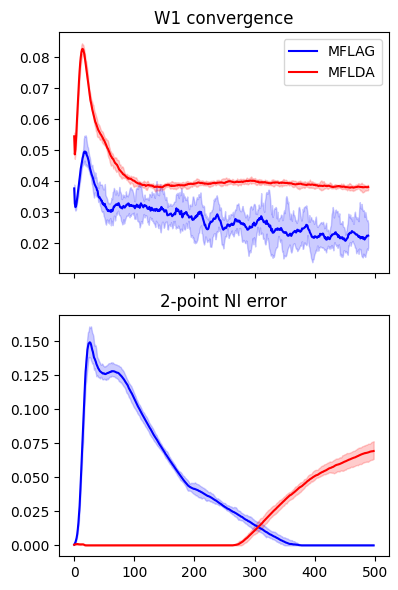

In [ ]:
x_moving = range(epochs - window)
x_ni = range(epochs - 1)

fig1, ax1 = plt.subplots(2, 1, figsize=(4, 6), sharex = True)

lst_moving_ag = np.array(lst_moving_ag)
lst_moving_gda = np.array(lst_moving_gda)
lst_ni_ag = np.array(lst_ni_ag)
lst_ni_gda = np.array(lst_ni_gda)

moving_ag_max = lst_moving_ag.max(axis = 0)
moving_ag_min = lst_moving_ag.min(axis = 0)
moving_ag_mean = lst_moving_ag.mean(axis = 0)

moving_gda_max = lst_moving_gda.max(axis = 0)
moving_gda_min = lst_moving_gda.min(axis = 0)
moving_gda_mean = lst_moving_gda.mean(axis = 0)

ni_ag_max = lst_ni_ag.max(axis = 0)
ni_ag_min = lst_ni_ag.min(axis = 0)
ni_ag_mean = lst_ni_ag.mean(axis = 0)

ni_gda_max = lst_ni_gda.max(axis = 0)
ni_gda_min = lst_ni_gda.min(axis = 0)
ni_gda_mean = lst_ni_gda.mean(axis = 0)

ax1[0].plot(x_moving, moving_ag_mean, color = 'b')
ax1[0].plot(x_moving, moving_gda_mean, color = 'r')
ax1[0].fill_between(x_moving, moving_ag_min, moving_ag_max, alpha = 0.2, color = 'b')
ax1[0].fill_between(x_moving, moving_gda_min, moving_gda_max, alpha = 0.2, color = 'r')

ax1[1].plot(x_ni, ni_ag_mean, color = 'b')
ax1[1].plot(x_ni, ni_gda_mean, color = 'r')
ax1[1].fill_between(x_ni, ni_ag_min, ni_ag_max, alpha = 0.2, color = 'b')
ax1[1].fill_between(x_ni, ni_gda_min, ni_gda_max, alpha = 0.2, color = 'r')

ax1[0].set_title('W1 convergence')
ax1[1].set_title('2-point NI error')

lines = [Line2D([0], [0], color=c) for c in ['b', 'r']]
labels = ['MFLAG', 'MFLDA']
ax1[0].legend(lines, labels)

fig1.tight_layout()
fig1.show()

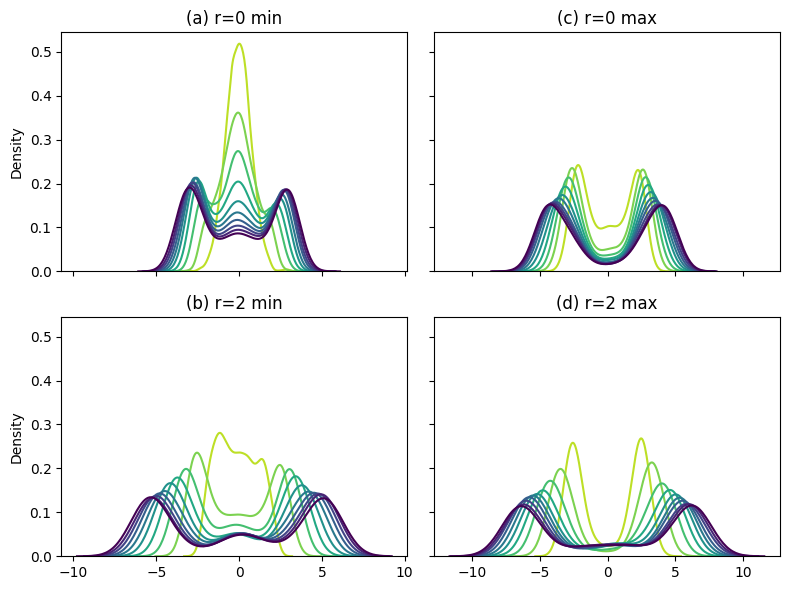

In [ ]:
# MFLAG r = 0
r1 = 0
beta1 = np.arange(1, epochs + 1) ** r1
B1 = np.cumsum(beta1)

x = np.random.normal(size = N)
y = np.random.normal(size = N)
x_new = copy.copy(x)
y_new = copy.copy(y)
# r = 2
r2 = 2
beta2 = np.arange(1, epochs + 1) ** r2
B2 = np.cumsum(beta2)

x1 = np.random.normal(size = N)
y1 = np.random.normal(size = N)
x1_new = copy.copy(x1)
y1_new = copy.copy(y1)

conv1 = np.zeros(epochs - 1)
conv2 = np.zeros(epochs - 1)
ni1 = np.zeros(epochs - 1)
ni2 = np.zeros(epochs - 1)

p = plt.get_cmap('viridis')
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex = 'col', sharey = True)
plotstep = epochs // 10

for k in range(1, epochs):
  x_prev = copy.copy(x)
  y_prev = copy.copy(y)
  x1_prev = copy.copy(x1)
  y1_prev = copy.copy(y1)

  x_new = (1 - temp * lr) * x_new - lr * qx(x_new, y[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
  y_new = (1 - temp * lr) * y_new + lr * qy(x, y_new[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

  x_ind = np.random.choice(N, size = math.floor(beta1[k] * N / B1[k]), replace = False)
  x_ind_new = np.random.choice(N, size = math.floor(beta1[k] * N / B1[k]), replace = False)
  y_ind = np.random.choice(N, size = math.floor(beta1[k] * N / B1[k]), replace = False)
  y_ind_new = np.random.choice(N, size = math.floor(beta1[k] * N / B1[k]), replace = False)

  x[x_ind] = x_new[x_ind_new]
  y[y_ind] = y_new[y_ind_new]

  x1_new = (1 - temp * lr) * x1_new - lr * qx(x1_new, y1[:, None]).mean(axis = 0) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)
  y1_new = (1 - temp * lr) * y1_new + lr * qy(x1, y1_new[:, None]).mean(axis = 1) + math.sqrt(2 * temp * lr) * np.random.normal(0, 1, N)

  x1_ind = np.random.choice(N, size = math.floor(beta2[k] * N / B2[k]), replace = False)
  x1_ind_new = np.random.choice(N, size = math.floor(beta2[k] * N / B2[k]), replace = False)
  y1_ind = np.random.choice(N, size = math.floor(beta2[k] * N / B2[k]), replace = False)
  y1_ind_new = np.random.choice(N, size = math.floor(beta2[k] * N / B2[k]), replace = False)

  x1[x1_ind] = x1_new[x1_ind_new]
  y1[y1_ind] = y1_new[y1_ind_new]

  conv1[k - 1] = stats.wasserstein_distance(x, x_prev) + stats.wasserstein_distance(y, y_prev)
  conv2[k - 1] = stats.wasserstein_distance(x1, x1_prev) + stats.wasserstein_distance(y1, y1_prev)

  ni1[k - 1] = max(q(x, y[:, None]).mean(), q(x, y1[:, None]).mean()) - min(q(x, y[:, None]).mean(), q(x1, y[:, None]).mean())
  ni2[k - 1] = max(q(x1, y1[:, None]).mean(), q(x1, y[:, None]).mean()) - min(q(x1, y1[:, None]).mean(), q(x, y1[:, None]).mean())

  if (k+1) % plotstep == 0:
    sns.kdeplot(x, color = p(1 - k/(epochs - 1)), ax = ax[0, 0])
    ax[0, 0].set_title('(a) r=0 min')
    sns.kdeplot(y, color = p(1 - k/(epochs - 1)), ax = ax[0, 1])
    ax[0, 1].set_title('(c) r=0 max')

    sns.kdeplot(x1, color = p(1 - k/(epochs - 1)), ax = ax[1, 0])
    ax[1, 0].set_title('(b) r=2 min')
    sns.kdeplot(y1, color = p(1 - k/(epochs - 1)), ax = ax[1, 1])
    ax[1, 1].set_title('(d) r=2 max')

# ax[1, 1].set_ylim(0, 0.25)

fig.tight_layout()
fig.show()

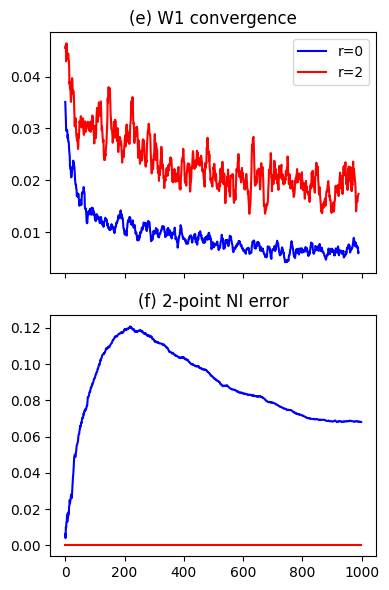

In [ ]:
fig2, ax2 = plt.subplots(2, 1, figsize=(4, 6), sharex = True)

convdf = pd.DataFrame({'c1': conv1, 'c2': conv2})
moving1 = convdf['c1'].rolling(window).mean().values
moving1 = moving1[window - 1:]
moving2 = convdf['c2'].rolling(window).mean().values
moving2 = moving2[window - 1:]

ax2[0].plot(moving1, color = 'b')
ax2[0].plot(moving2, color = 'r')

ax2[1].plot(ni1, color = 'b')
ax2[1].plot(ni2, color = 'r')

ax2[0].set_title('(e) W1 convergence')
ax2[1].set_title('(f) 2-point NI error')

lines = [Line2D([0], [0], color=c) for c in ['b', 'r']]
labels = ['r=0', 'r=2']
ax2[0].legend(lines, labels)

fig2.tight_layout()
fig2.show()